In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.particleNode import InclusiveParticleNode
from smodels.experiment.expAuxiliaryFuncs import bracketToProcessStr
from smodels.experiment.defaultFinalStates import finalStates
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
from smodels.theory.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
import networkx as nx

### Convert process string to graph

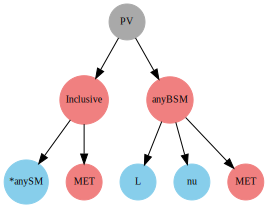

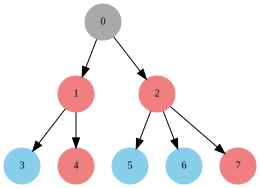

[PV, Inclusive, anyBSM, *anySM, MET, L, nu, MET]
[(PV, Inclusive), (PV, anyBSM), (Inclusive, *anySM), (Inclusive, MET), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [2]:
stringEl = "[ ['*'] , [ ['L','nu'] ] ]"
T = ExpSMS.from_string(stringEl,model=finalStates)
T.draw()
T.draw(labelAttr='node')
print(T.nodes)
print(T.edges)

### SMS comparison

In [3]:
slhafile="../inputFiles/slha/lightEWinos.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)

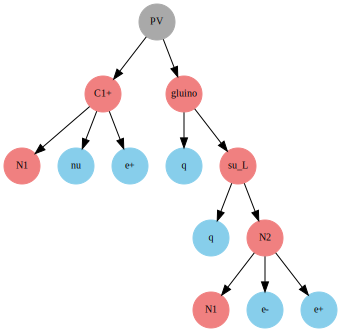

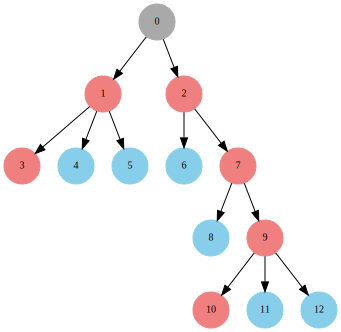

In [4]:
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string("(PV > C1+(1),gluino(2)), (C1+(1)>e+,nue,N1), (gluino(2) > q,su_L(3)), (su_L(3) > u,N2(4)), (N2(4) > e+,e-,N1)",
                            model=model)
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()
treeA.draw()
treeA.draw(labelAttr='node')

In [5]:
self = T
other = treeA

In [6]:
mapDict = self.computeMatchingDict(other,self.rootIndex,other.rootIndex)

In [7]:
print(mapDict)

{3: {6: {3: 6}, 8: {3: 8}, 11: {3: 11}, 12: {3: 12}}, 4: 10, 1: 2, 5: 5, 6: 4, 7: 3, 2: 1, 0: 0}


In [8]:
# For inclusiveLists, set the firt match
mapDictInv = {n2 if not isinstance(n2,dict) else list(n2.keys())[0] : n1  for n1,n2 in list(mapDict.items())}
print(mapDictInv)

{6: 3, 10: 4, 2: 1, 5: 5, 4: 6, 3: 7, 1: 2, 0: 0}


In [9]:
# Get max node number:
maxNode = max(mapDictInv.values())
missingNodes = set(other.nodeIndices).difference(set(mapDictInv.keys()))
# Add missing nodes to mapDict:
for n2 in missingNodes:
    maxNode += 1
    mapDictInv[n2] = maxNode
print(mapDictInv)

{6: 3, 10: 4, 2: 1, 5: 5, 4: 6, 3: 7, 1: 2, 0: 0, 7: 8, 8: 9, 9: 10, 11: 11, 12: 12}


In [10]:
# Make empty copy from self:
matchedTree = other.copy()
# Copy tree structure (node indices, node order,....)
# from self to other and use nodesDict to set the
# corresponding node objects
matchedTree.relabelNodeIndices(mapDictInv)


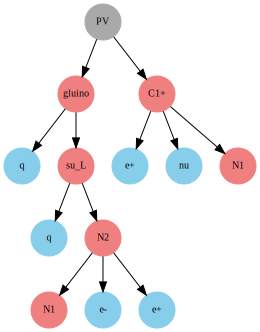

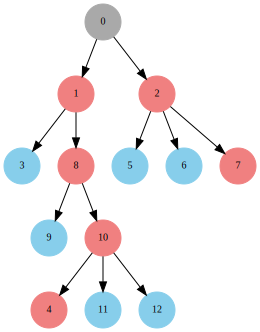

In [11]:
matchedTree.draw()
matchedTree.draw(labelAttr='node')